## Analysis of algorithms that make exact recovery of the cluster structure in GBM
Model description is [here](https://arxiv.org/pdf/1709.05510.pdf)

Candidate algorithms are: 
1. Motif-counting algorithm (from the above paper) and its modification from [here](https://arxiv.org/abs/1804.05013)
2. Spectral clustering with a smart choice of the optimal eigenvectors (k-means around optimal value)
3. Expansion algorithm described in my draft [here](https://www.overleaf.com/project/5e9483ae085e6600014af805)

Last update: 21/05/2020

### This notebook uses the classes.py file where principal classes and functions are defined

File classes.py is on autoreload

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns
from classes import GBM_graph, Motif_Counting_second_paper, Expansion_algorithm, Spectral_k_means, Common_neigbours_labeling, simulation, full_simulation
import tqdm
import time 
import warnings
import copy
warnings.filterwarnings("ignore")
%matplotlib inline

%load_ext autoreload
%autoreload 2

a = 10, b = 5, Motif_Counting_second_paper = 80.0% (32sec), Expansion_algorithm = 56.0% (28sec), Spectral_k_means = 98.0% (7sec), 
a = 11, b = 5, Motif_Counting_second_paper = 95.0% (35sec), Expansion_algorithm = 61.0% (47sec), Spectral_k_means = 98.0% (5sec), 
a = 12, b = 5, Motif_Counting_second_paper = 90.0% (44sec), Expansion_algorithm = 65.0% (81sec), Spectral_k_means = 100.0% (7sec), 
a = 13, b = 5, Motif_Counting_second_paper = 95.0% (45sec), Expansion_algorithm = 86.0% (71sec), Spectral_k_means = 100.0% (7sec), 
a = 14, b = 5, Motif_Counting_second_paper = 98.0% (47sec), Expansion_algorithm = 98.0% (28sec), Spectral_k_means = 100.0% (7sec), 
a = 15, b = 5, Motif_Counting_second_paper = 100.0% (49sec), Expansion_algorithm = 97.0% (16sec), Spectral_k_means = 97.0% (7sec), 
a = 16, b = 5, Motif_Counting_second_paper = 100.0% (51sec), Expansion_algorithm = 100.0% (16sec), Spectral_k_means = 100.0% (8sec), 
a = 17, b = 5, Motif_Counting_second_paper = 100.0% (60sec), Expansion_algor

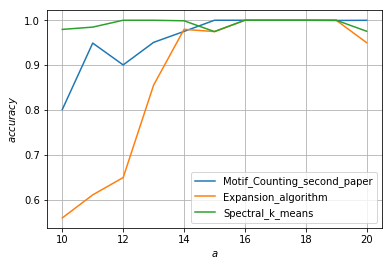

In [11]:
fs5_500 = full_simulation([Motif_Counting_second_paper, Expansion_algorithm, Spectral_k_means], 
                          n_1 = 500, 
                          n_2 = 500, 
                          a_start = 10, 
                          a_finish = 21, 
                          a_step = 1, 
                          b = 5,
                          n_trials = 20)

a = 10, b = 5, Motif_Counting_second_paper = 85.0% (77sec), Expansion_algorithm = 54.0% (48sec), Spectral_k_means = 84.0% (19sec), 
a = 11, b = 5, Motif_Counting_second_paper = 94.0% (91sec), Expansion_algorithm = 57.0% (85sec), Spectral_k_means = 94.0% (20sec), 
a = 12, b = 5, Motif_Counting_second_paper = 93.0% (102sec), Expansion_algorithm = 62.0% (137sec), Spectral_k_means = 96.0% (17sec), 
a = 13, b = 5, Motif_Counting_second_paper = 97.0% (111sec), Expansion_algorithm = 73.0% (164sec), Spectral_k_means = 97.0% (18sec), 
a = 14, b = 5, Motif_Counting_second_paper = 98.0% (115sec), Expansion_algorithm = 99.0% (70sec), Spectral_k_means = 100.0% (18sec), 
a = 15, b = 5, Motif_Counting_second_paper = 97.0% (131sec), Expansion_algorithm = 97.0% (47sec), Spectral_k_means = 99.0% (20sec), 
a = 16, b = 5, Motif_Counting_second_paper = 100.0% (145sec), Expansion_algorithm = 97.0% (44sec), Spectral_k_means = 100.0% (19sec), 
a = 17, b = 5, Motif_Counting_second_paper = 100.0% (138sec), Expa

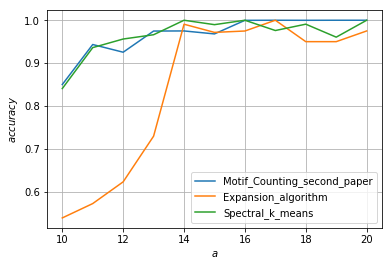

In [12]:
fs5_1000 = full_simulation([Motif_Counting_second_paper, Expansion_algorithm, Spectral_k_means], 
                          n_1 = 1000, 
                          n_2 = 1000, 
                          a_start = 10, 
                          a_finish = 21, 
                          a_step = 1, 
                          b = 5,
                          n_trials = 20)

In [63]:
G = GBM_graph(n_1 = 1000, n_2 = 1000, a = 15, b = 5, disp = False)

In [65]:
ea = Expansion_algorithm(G)

In [56]:
200*201/2

20100.0

In [145]:
s = set()
s.add(('a', 'b'))
s1 = set()
s1.add(('c', 'd'))
s2 = s.union(s1)
print(s2)

TypeError: union() takes no keyword arguments

a = 7, b = 7, Common_neigbours_labeling = 52.0% (1sec), 
a = 8, b = 7, Common_neigbours_labeling = 58.0% (1sec), 
a = 9, b = 7, Common_neigbours_labeling = 63.0% (1sec), 
a = 10, b = 7, Common_neigbours_labeling = 67.0% (1sec), 
a = 11, b = 7, Common_neigbours_labeling = 73.0% (1sec), 
a = 12, b = 7, Common_neigbours_labeling = 77.0% (1sec), 
a = 13, b = 7, Common_neigbours_labeling = 80.0% (1sec), 
a = 14, b = 7, Common_neigbours_labeling = 83.0% (1sec), 
a = 15, b = 7, Common_neigbours_labeling = 86.0% (1sec), 
a = 16, b = 7, Common_neigbours_labeling = 89.0% (1sec), 
a = 17, b = 7, Common_neigbours_labeling = 91.0% (1sec), 
a = 18, b = 7, Common_neigbours_labeling = 93.0% (1sec), 
a = 19, b = 7, Common_neigbours_labeling = 94.0% (2sec), 
a = 20, b = 7, Common_neigbours_labeling = 96.0% (2sec), 


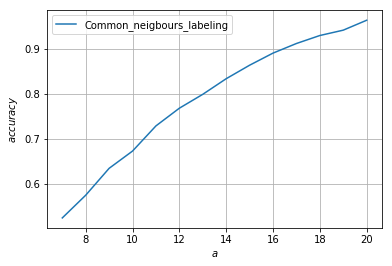

In [122]:
fs0_05_1000 = full_simulation([Common_neigbours_labeling], 
                          n_1 = 1000, 
                          n_2 = 1000, 
                          a_start = 7, 
                          a_finish = 21, 
                          a_step = 1, 
                          b = 7,
                          n_trials = 20)

a = 5, b = 5, Common_neigbours_labeling = 52.0% (1sec), 
a = 6, b = 5, Common_neigbours_labeling = 58.0% (1sec), 
a = 7, b = 5, Common_neigbours_labeling = 64.0% (1sec), 
a = 8, b = 5, Common_neigbours_labeling = 69.0% (1sec), 
a = 9, b = 5, Common_neigbours_labeling = 74.0% (1sec), 
a = 10, b = 5, Common_neigbours_labeling = 77.0% (1sec), 
a = 11, b = 5, Common_neigbours_labeling = 82.0% (1sec), 
a = 12, b = 5, Common_neigbours_labeling = 84.0% (1sec), 
a = 13, b = 5, Common_neigbours_labeling = 88.0% (1sec), 
a = 14, b = 5, Common_neigbours_labeling = 90.0% (1sec), 
a = 15, b = 5, Common_neigbours_labeling = 91.0% (1sec), 
a = 16, b = 5, Common_neigbours_labeling = 93.0% (1sec), 
a = 17, b = 5, Common_neigbours_labeling = 94.0% (1sec), 
a = 18, b = 5, Common_neigbours_labeling = 96.0% (1sec), 
a = 19, b = 5, Common_neigbours_labeling = 97.0% (1sec), 
a = 20, b = 5, Common_neigbours_labeling = 97.0% (2sec), 


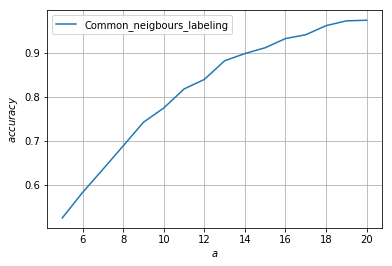

In [123]:
fs0_05_1000 = full_simulation([Common_neigbours_labeling], 
                          n_1 = 1000, 
                          n_2 = 1000, 
                          a_start = 5, 
                          a_finish = 21, 
                          a_step = 1, 
                          b = 5,
                          n_trials = 20)

a = 5, b = 5, Common_neigbours_labeling = 52.0% (2sec), 
a = 6, b = 5, Common_neigbours_labeling = 58.0% (2sec), 
a = 7, b = 5, Common_neigbours_labeling = 64.0% (2sec), 
a = 8, b = 5, Common_neigbours_labeling = 70.0% (2sec), 
a = 9, b = 5, Common_neigbours_labeling = 76.0% (2sec), 
a = 10, b = 5, Common_neigbours_labeling = 79.0% (2sec), 
a = 11, b = 5, Common_neigbours_labeling = 84.0% (2sec), 
a = 12, b = 5, Common_neigbours_labeling = 86.0% (2sec), 
a = 13, b = 5, Common_neigbours_labeling = 90.0% (2sec), 
a = 14, b = 5, Common_neigbours_labeling = 92.0% (2sec), 
a = 15, b = 5, Common_neigbours_labeling = 93.0% (2sec), 
a = 16, b = 5, Common_neigbours_labeling = 95.0% (2sec), 
a = 17, b = 5, Common_neigbours_labeling = 95.0% (3sec), 
a = 18, b = 5, Common_neigbours_labeling = 96.0% (3sec), 
a = 19, b = 5, Common_neigbours_labeling = 97.0% (3sec), 
a = 20, b = 5, Common_neigbours_labeling = 98.0% (3sec), 


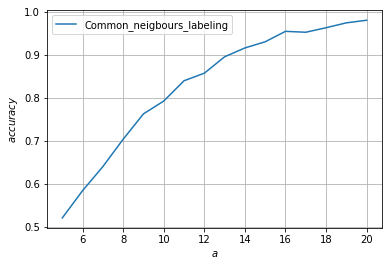

In [124]:
fs0_05_25000 = full_simulation([Common_neigbours_labeling], 
                          n_1 = 2500, 
                          n_2 = 2500, 
                          a_start = 5, 
                          a_finish = 21, 
                          a_step = 1, 
                          b = 5,
                          n_trials = 10)

In [3]:
G = GBM_graph(n_1 = 500, n_2 = 500, a = 13, b = 5, disp = False)

In [9]:
m = Motif_Counting_second_paper(G)